In [95]:
#@title
import warnings
warnings.filterwarnings("ignore")
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import ipywidgets as widgets
mpl.rcParams['figure.dpi'] = 150

In [96]:
%%capture
#@title
!pip install astral ephem

In [97]:
#@title
df_dict = {}

for file in [
    "Hirschensitz%20photo_list.csv",
    "Kalchgruber%20Loch%20photo_list.csv",
    "Plotschergraben%20photo_list.csv",
    "Russengraben%20photo_list.csv",
    "Schottergrube%20photo_list.csv",
    "Wildacker%20photo_list.csv"
]:
    file = "https://github.com/MiniXC/auswertung/raw/main/" + file
    df = pd.read_csv(file, names=["path","created_date","modified_date"], parse_dates=["created_date","modified_date"])
    df["modified_date"] = pd.to_datetime(df["modified_date"].apply(str),unit='s')
    df["created_date"] = pd.to_datetime(df["created_date"].apply(str),unit='s')
    name = file.split("/")[-1].split("%20")[:-1]
    df_dict[" ".join(name)] = df

In [98]:
#@title
keys = sorted(df_dict.keys())

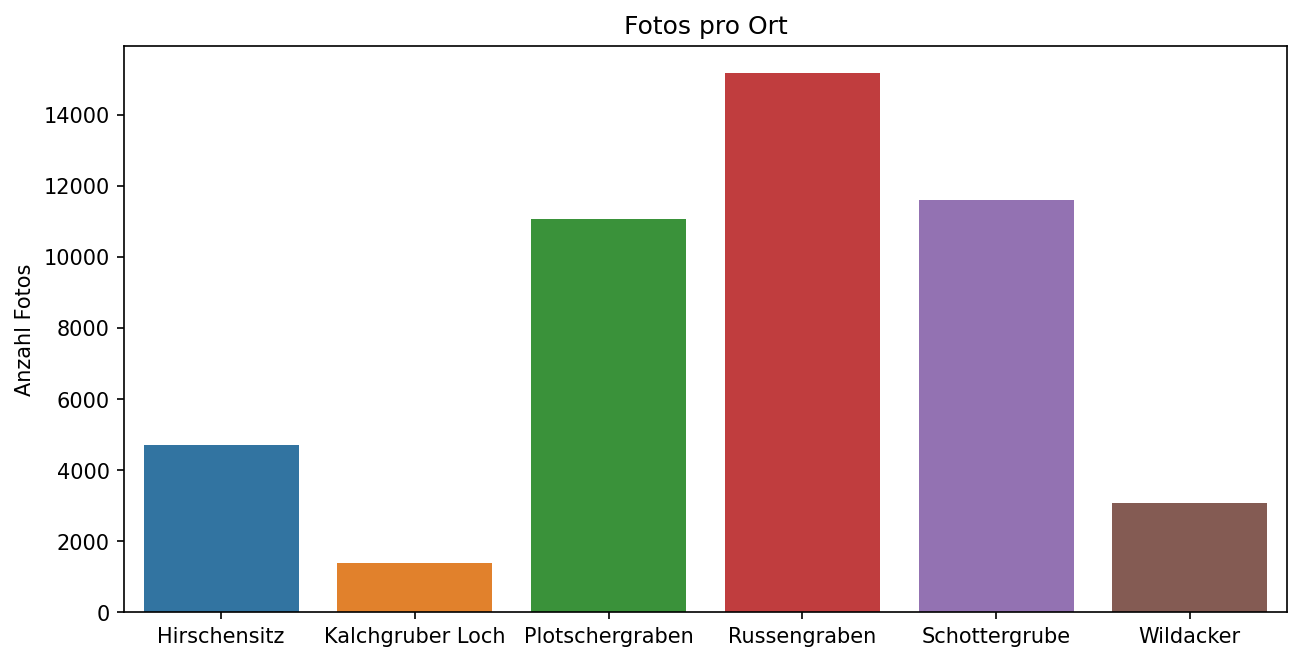

In [99]:
#@title
plt.figure(figsize=(10,5))
sns.barplot(x=[x for x in keys], y=[df_dict[x].size for x in keys])
plt.title("Fotos pro Ort")
plt.ylabel("Anzahl Fotos")
plt.show()

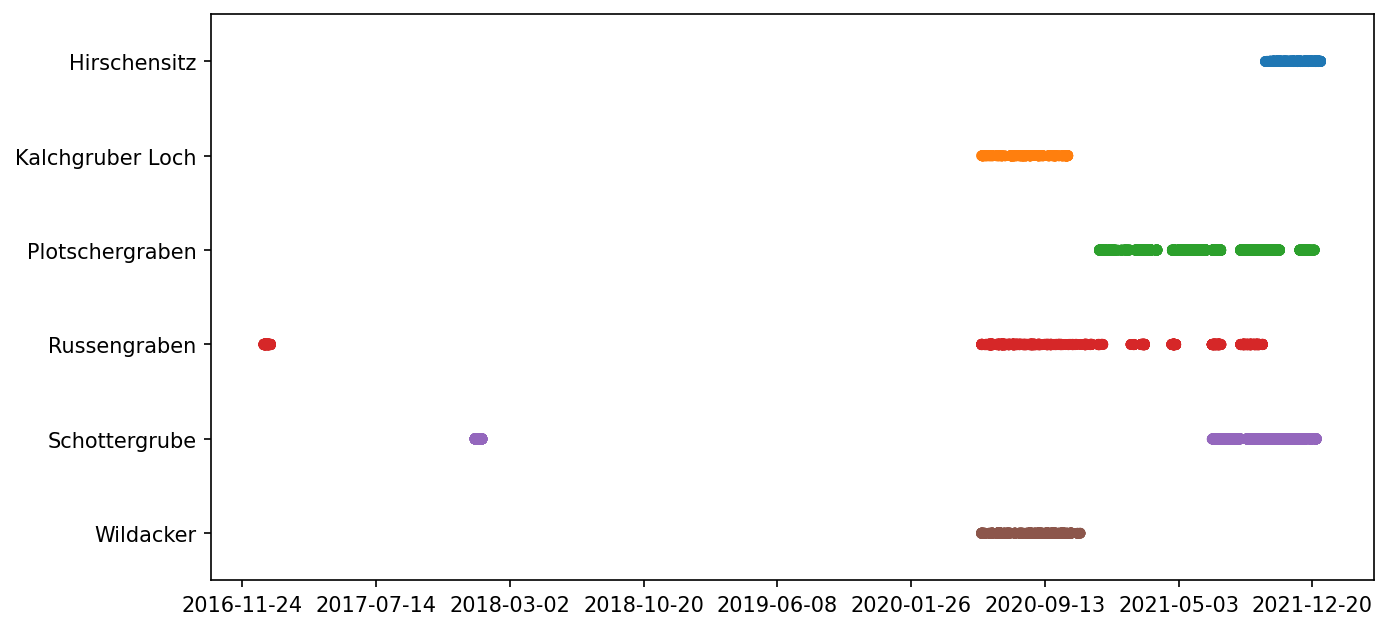

In [100]:
#@title
created = []
labels = []

for key in keys:
    created += df_dict[key]["created_date"].values.tolist()
    labels += [key]*len(df_dict[key])
fig = plt.figure(figsize=(10,5))
ax = sns.stripplot(x=created, y=labels, jitter=0.005)
fig.canvas.draw()
labels = [pd.to_datetime(float(item.get_text())*1e18).date() for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.show()

In [101]:
#@title
for key in keys:
    df_dict[key] = df_dict[key][df_dict[key]["created_date"].dt.year>=2020]

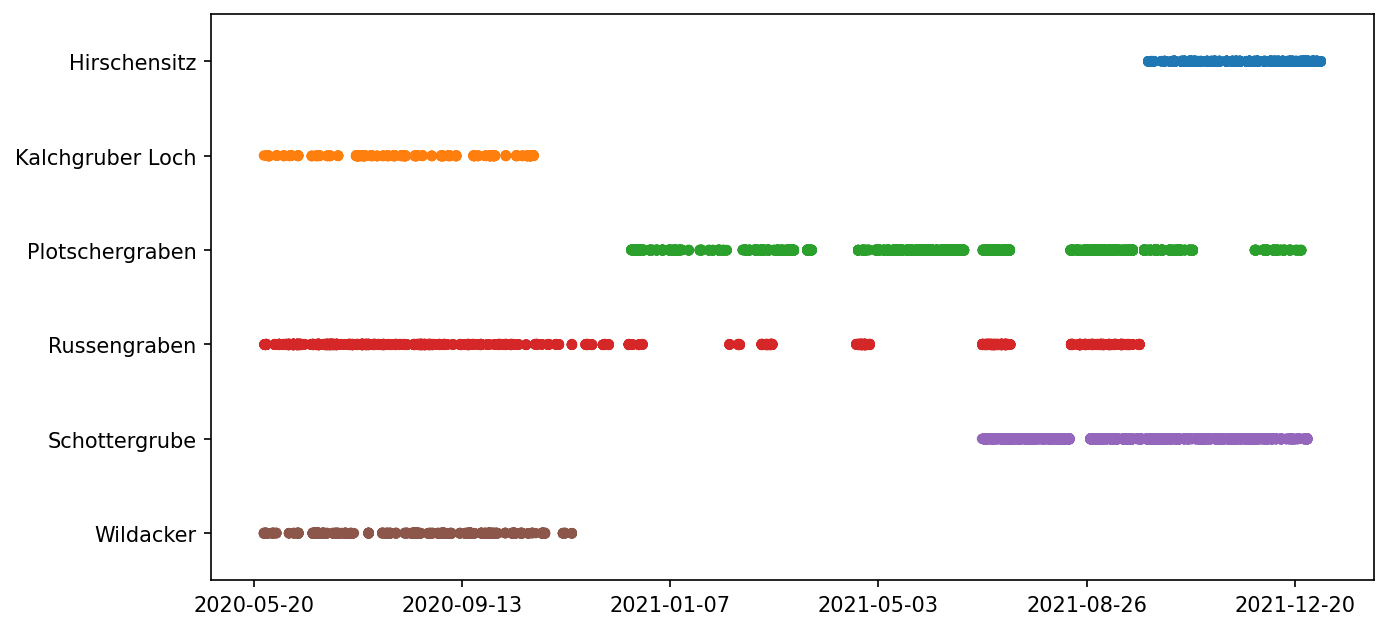

In [102]:
#@title
created = []
labels = []

for key in keys:
    created += df_dict[key]["created_date"].values.tolist()
    labels += [key]*len(df_dict[key])
fig = plt.figure(figsize=(10,5))
ax = sns.stripplot(x=created, y=labels, jitter=0.005)
fig.canvas.draw()
labels = [pd.to_datetime(float(item.get_text())*1e18).date() for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.show()

In [103]:
#@title
def display_location(location):
    plt.figure(figsize=(10,5))
    sns.histplot(x=df_dict[location]["created_date"], color=sns.color_palette()[keys.index(location)])
    plt.xlabel("Datum")
    plt.show()
widgets.interact(display_location, location=keys);

interactive(children=(Dropdown(description='location', options=('Hirschensitz', 'Kalchgruber Loch', 'Plotscher…

<function __main__.display_location(location)>

In [104]:
#@title
def draw_plot(location):
    if location == "Alle":
        df = pd.concat(df_dict.values())
    else:
        df = df_dict[location].copy()
    df["month"] = df["created_date"].dt.month
    df = df.groupby(df["created_date"].dt.month)["month"].count().reset_index()
    for m in range(1,13):
        if m not in df["created_date"].values:
            df = df.append({"created_date": m, "month": 0}, ignore_index=True)
        df = df.sort_values("created_date", ascending=False)
    plt.figure(figsize=(20,10))
    ax = plt.subplot(111, polar=True)
    plt.axis('off')
    upperLimit = 100
    lowerLimit = 30
    max_val = df["month"].max()
    slope = (max_val - lowerLimit) / max_val
    heights = slope * df["month"] + lowerLimit
    width = 2*np.pi / len(df.index)
    indexes = list(range(1, len(df.index)+1))
    angles = [element * width for element in indexes]
    try:
        idx = keys.index(location)
    except:
        idx = len(keys)
    bars = ax.bar(
        x=angles, 
        height=heights, 
        width=width, 
        bottom=lowerLimit,
        linewidth=2, 
        edgecolor="white",
        color=sns.color_palette()[idx],
    )
    labelPadding = 4
    for bar, angle, height, label in zip(bars,angles, heights, df["created_date"]):
        rotation = np.rad2deg(angle)
        alignment = ""
        if angle >= np.pi/2 and angle < 3*np.pi/2:
            alignment = "right"
            rotation = rotation + 180
        else: 
            alignment = "left"
        ax.text(
            x=angle, 
            y=lowerLimit + bar.get_height() + labelPadding, 
            s=label, 
            ha=alignment, 
            va='center', 
            rotation=rotation, 
            rotation_mode="anchor") 
    plt.title(f"Auslösungen pro Monat ({location})")
    plt.show()

In [105]:
#@title
widgets.interact(draw_plot, location=keys+["Alle"]);

interactive(children=(Dropdown(description='location', options=('Hirschensitz', 'Kalchgruber Loch', 'Plotscher…

<function __main__.draw_plot(location)>

In [106]:
#@title
def draw_plot_hour(location):
    if location == "Alle":
        df = pd.concat(df_dict.values())
    else:
        df = df_dict[location].copy()
    df["month"] = df["created_date"].dt.hour
    df = df.groupby(df["created_date"].dt.hour)["month"].count().reset_index()
    for m in range(24):
        if m not in df["created_date"].values:
            df = df.append({"created_date": m, "month": 0}, ignore_index=True)
        df = df.sort_values("created_date", ascending=False)
    plt.figure(figsize=(20,10))
    ax = plt.subplot(111, polar=True)
    plt.axis('off')
    upperLimit = 100
    lowerLimit = 30
    max_val = df["month"].max()
    slope = (max_val - lowerLimit) / max_val
    heights = slope * df["month"] + lowerLimit
    width = 2*np.pi / len(df.index)
    indexes = list(range(1, len(df.index)+1))
    angles = [element * width for element in indexes]
    try:
        idx = keys.index(location)
    except:
        idx = len(keys)
    bars = ax.bar(
        x=angles, 
        height=heights, 
        width=width, 
        bottom=lowerLimit,
        linewidth=2, 
        edgecolor="white",
        color=sns.color_palette()[idx],
    )
    labelPadding = 4
    for bar, angle, height, label in zip(bars,angles, heights, df["created_date"]):
        rotation = np.rad2deg(angle)
        alignment = ""
        if angle >= np.pi/2 and angle < 3*np.pi/2:
            alignment = "right"
            rotation = rotation + 180
        else: 
            alignment = "left"
        ax.text(
            x=angle, 
            y=lowerLimit + bar.get_height() + labelPadding, 
            s=label, 
            ha=alignment, 
            va='center', 
            rotation=rotation, 
            rotation_mode="anchor") 
    plt.title(f"Auslösungen pro Stunde ({location})")
    plt.show()

In [107]:
#@title
widgets.interact(draw_plot_hour, location=keys+["Alle"]);

interactive(children=(Dropdown(description='location', options=('Hirschensitz', 'Kalchgruber Loch', 'Plotscher…

<function __main__.draw_plot_hour(location)>

In [108]:
#@title
import ephem

def get_phase_on_day(date):
    date=ephem.Date(date)
    nnm = ephem.next_new_moon(date)
    pnm = ephem.previous_new_moon(date)
    lunation=(date-pnm)/(nnm-pnm)
    return lunation

In [109]:
#@title
def draw_plot_lunar(location):
    if location == "Alle":
        df = pd.concat(df_dict.values())
    else:
        df = df_dict[location].copy()
    df["month"] = np.digitize(df["created_date"].apply(get_phase_on_day).values, np.arange(0,1.03125,0.03125))
    df[df["month"]==32]=1
    for i in range(2,32,2):
        df[df["month"]==i]=i+1
    df = df.groupby(df["month"])["created_date"].count().reset_index()
    for m in range(1,32,2):
        if m not in df["month"].values:
            df = df.append({"created_date": 0, "month": m}, ignore_index=True)
        df = df.sort_values("month", ascending=False)
    plt.figure(figsize=(20,10))
    ax = plt.subplot(111, polar=True)
    plt.axis('off')
    upperLimit = 100
    lowerLimit = 30
    max_val = df["created_date"].max()
    slope = (max_val - lowerLimit) / max_val
    heights = slope * df["created_date"] + lowerLimit
    width = 2*np.pi / len(df.index)
    indexes = list(range(1, len(df.index)+1))
    angles = [element * width for element in indexes]
    try:
        idx = keys.index(location)
    except:
        idx = len(keys)
    bars = ax.bar(
        x=angles, 
        height=heights, 
        width=width, 
        bottom=lowerLimit,
        linewidth=2, 
        edgecolor="white",
        color=sns.color_palette()[idx],
    )
    labelPadding = 4
    for bar, angle, height, label in zip(bars,angles, heights, df["month"]):
        rotation = np.rad2deg(angle)
        alignment = ""
        if angle >= np.pi/2 and angle < 3*np.pi/2:
            alignment = "right"
            rotation = rotation + 180
        else: 
            alignment = "left"
        text = label
        if 3 <= label <= 15:
            text = ""
        if 19 <= label <= 31:
            text = ""
        if label == 17:
            text = "Vollmond"
        if label == 1:
            text = "Neumond"
        if label in [9,25]:
            text = "Halbmond"
        
        ax.text(
            x=angle, 
            y=lowerLimit + bar.get_height() + labelPadding, 
            s=text, 
            ha=alignment, 
            va='center', 
            rotation=rotation, 
            rotation_mode="anchor") 
    plt.title(f"Auslösungen pro Mondphase ({location})")
    plt.show()

In [110]:
#@title
widgets.interact(draw_plot_lunar, location=keys+["Alle"]);

interactive(children=(Dropdown(description='location', options=('Hirschensitz', 'Kalchgruber Loch', 'Plotscher…

<function __main__.draw_plot_lunar(location)>

In [111]:
#@title
from astral.geocoder import database, lookup
from astral.sun import sun
from datetime import datetime

In [112]:
#@title
city = lookup("Vienna", database())

In [113]:
#@title
def get_time_to_sunrise(date):
    date = date.to_pydatetime()
    sunrise = sun(city.observer, date=date.date())["sunrise"]
    sunrise = sunrise.replace(tzinfo=None)
    delta = date-sunrise
    seconds_in_day = 24 * 60 * 60
    sunrise_diff = divmod(delta.days * seconds_in_day + delta.seconds, 60)[0]
    sunset = sun(city.observer, date=date.date())["sunset"]
    sunset = sunset.replace(tzinfo=None)
    delta = date-sunset
    seconds_in_day = 24 * 60 * 60
    sunset_diff = divmod(delta.days * seconds_in_day + delta.seconds, 60)[0]
    if abs(sunset_diff) < abs(sunrise_diff):
        return (-4*60+sunset_diff)//60
    else:
        return (4*60+sunrise_diff)//60
    
def draw_plot_sunrise(location):
    if location == "Alle":
        df = pd.concat(df_dict.values())
    else:
        df = df_dict[location]
    df["month"] = df["created_date"].apply(get_time_to_sunrise)
    df = df.groupby("month").count().reset_index()
    df = df.sort_values("month", ascending=False)
    plt.figure(figsize=(20,10))
    ax = plt.subplot(111, polar=True)
    plt.axis('off')
    upperLimit = 100
    lowerLimit = 30
    max_val = df["created_date"].max()
    slope = (max_val - lowerLimit) / max_val
    heights = slope * df["created_date"] + lowerLimit
    width = 2*np.pi / len(df.index)
    indexes = list(range(1, len(df.index)+1))
    angles = [element * width for element in indexes]
    try:
        idx = keys.index(location)
    except:
        idx = len(keys)
    angles = np.roll(angles, 18)
    bars = ax.bar(
        x=angles, 
        height=heights, 
        width=width, 
        bottom=lowerLimit,
        linewidth=2, 
        edgecolor="white",
        color=sns.color_palette()[idx],
    )
    labelPadding = 4
    for bar, angle, height, label in zip(bars, angles, heights, df["month"]):
        rotation = np.rad2deg(angle)
        alignment = ""
        if angle >= np.pi/2 and angle < 3*np.pi/2:
            alignment = "right"
            rotation = rotation + 180
        else: 
            alignment = "left"
        text = ""
        if label == -4:
            text = "Sonnenuntergang"
        if label == 4:
            text = "Sonnenaufgang"
        
        ax.text(
            x=angle, 
            y=lowerLimit + bar.get_height() + labelPadding, 
            s=text, 
            ha=alignment, 
            va='center', 
            rotation=rotation, 
            rotation_mode="anchor") 
    plt.title(f"Auslösungen nach Sonnenstand ({location})")
    plt.show()

In [115]:
#@title
widgets.interact(draw_plot_sunrise, location=keys+["Alle"]);

interactive(children=(Dropdown(description='location', options=('Hirschensitz', 'Kalchgruber Loch', 'Plotscher…